In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('PNJ.csv')
data.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


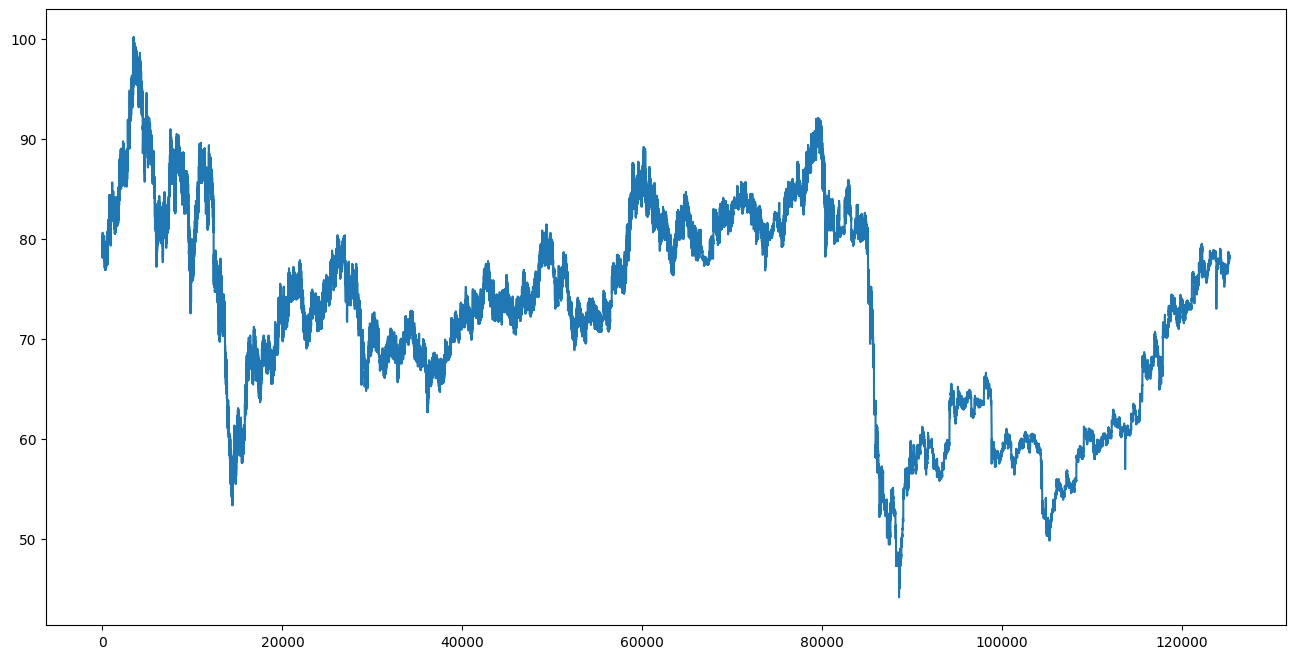

In [3]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],label='Close Price')

In [4]:
data['Open - Close']= data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [23]:
X = data[['Open - Close','High - Low']]
X.head()

,Open - Close,High - Low
0,-0.85,0.85
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00


In [7]:
Y = np.where(data['Close'].shift(-1)>data['Close'],1,-1)
Y

array([-1, -1, -1, ..., -1,  1, -1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  accuracy_score


params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

model.fit(X_train,y_train)

acc_train = accuracy_score(y_train,model.predict(X_train))
acc_test = accuracy_score(y_test,model.predict(X_test))


In [10]:
y = data['Close']


In [11]:
predict_class = model.predict(X_test)

In [13]:
acctual_data = pd.DataFrame({'Actual Class':y_test,'Predicted Class':predict_class})
acctual_data 

,Actual Class,Predicted Class
0,-1,-1
1,-1,-1
2,1,-1
3,1,-1
4,-1,-1
...,...,...
25057,1,-1
25058,1,-1
25059,-1,-1
25060,-1,-1


In [18]:
from sklearn.neighbors import  KNeighborsRegressor
from sklearn import neighbors

X_train_reg,X_test_reg,y_train_reg,y_test_reg = train_test_split(X,y,test_size=0.25,random_state=44)
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg,params,cv=5)

model_reg.fit(X_train_reg,y_train_reg)
pre = model_reg.predict(X_test_reg)



In [19]:
print(pre)

[72.28866667 74.726      76.31933333 ... 74.726      59.95066667
 69.94466667]


In [24]:
vail = pd.DataFrame({"Actual Close":y_test_reg,'Predicted  Close value':pre})
vail.head(10)

,Actual Close,Predicted Close value
28537,72.87,72.288667
23344,73.11,74.726000
52446,69.54,76.319333
118824,74.03,74.726000
14987,60.66,74.726000
74942,82.11,73.508667
4418,92.82,74.726000
27500,74.05,74.726000
111266,60.24,58.630000
64511,80.45,80.593333
